In [9]:
import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties
import numpy as np 

Define the system of three ODE's which can be encapsulated in a python class. During initialization we should specify the intial conditions for our system(X, Y, Z) along with the three time-independent constants: sigma, beta and rho

In [10]:
class Attractor():
    def __init__(self, X=1, Y=1, Z=1):
        self.x = X 
        self.y = Y 
        self.z = Z 
        self.sigma = 10 
        self.beta = 8 / 3
        self.rho = 28

    def step(self, dt=0.005):
        dx = self.sigma * (self.y - self.x)
        dy = self.x * (self.rho - self.z) - self.y 
        dz = self.x * self.y - self.beta - self.z

        self.x += dx * dt
        self.y += dy * dt
        self.z += dz * dt

In [14]:
butterfly = Attractor(1, 1, 1)
N = 15000
x, y, z = [], [], []
for i in range (N):
    x.append(butterfly.x)
    y.append(butterfly.y)
    z.append(butterfly.z)
    butterfly.step()

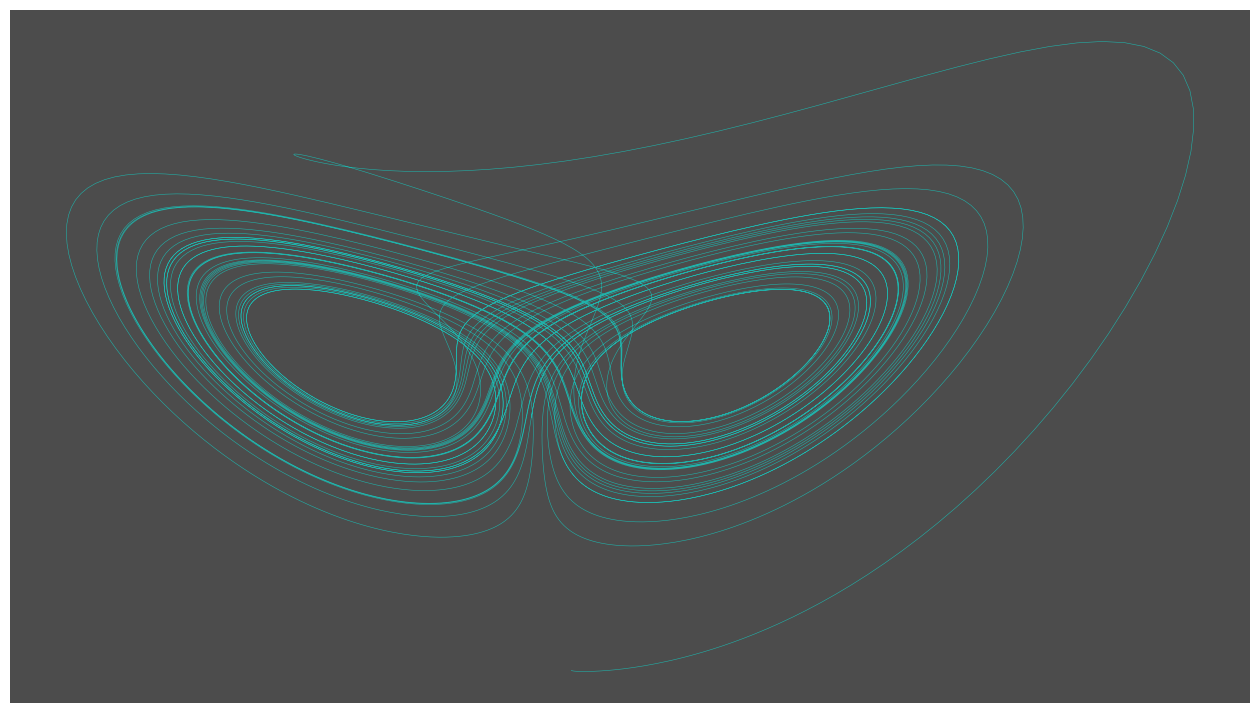

In [15]:
x, y, z = np.array(x), np.array(y), np.array(z)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x, z, lw=0.4, color='lightseagreen')
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)

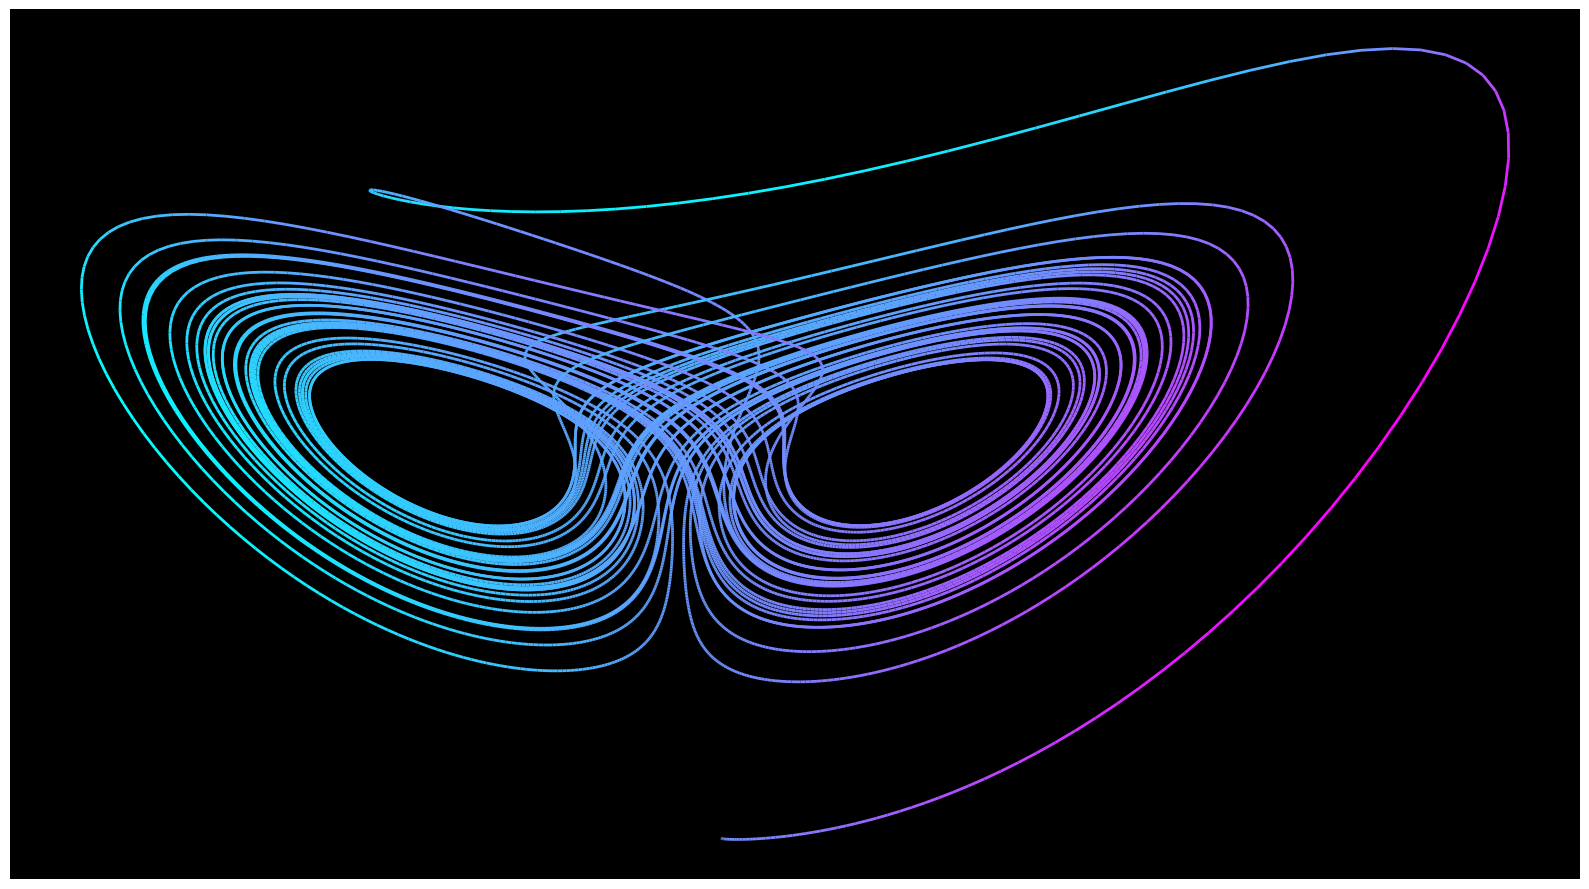

In [16]:
x, y, z = np.array(x), np.array(y), np.array(z)

points = np.array([x, z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis = 1)

lc = LineCollection(segments, cmap='cool')
lc.set_array(y)
lc.set_linewidth(2)

fig, ax = plt.subplots(figsize=(16, 9))
ax.add_collection(lc)
ax.autoscale_view()
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
#ax.text(-21, 2, 'Lorenz Attractor', fontproperties=font_prop, fontsize=25)
plt.tight_layout()
plt.savefig('Lorenz.png')
plt.show()

In [19]:
import plotly.graph_objects as go
import plotly.io as pio

plotly_template = pio.templates['plotly_dark']
fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=1.8, color=z, colorscale='Plotly3', showscale=False))], 
               frames = [go.Frame(data=[go.Scatter3d(x=x[:k], y=y[:k], z=z[:k], mode='lines')]) for k in range(1, len(x), 10)])

fig.update_layout(scene=dict(xaxis=dict(backgroundcolor='rgb(20, 20, 20)', showgrid=False, zerolinecolor='rgb(50, 50, 50)'),
                            yaxis=dict(backgroundcolor='rgb(20, 20, 20)', showgrid=False, zerolinecolor='rgb(50, 50, 50)'),
                            zaxis=dict(backgroundcolor='rgb(20, 20, 20)', showgrid=False, zerolinecolor='rgb(50, 50, 50)')),
                 paper_bgcolor='rgb(20, 20, 20)', font=dict(color='black'), updatemenus=[dict(type='buttons', showactive=False, buttons=[
                     dict(label='Play', method='animate', args=[None, {'frame':{'duration':2, 'redraw':True}, 'fromcurrent':True, 'mode':'immediate'}])
                 ], direction='left', pad=dict(r=10, t=87), x=0.1, xanchor='right', y=0, yanchor='top', bgcolor='white', bordercolor='white', font=dict(color='white'))],)
fig.write_html("lorenz_attractor_animation.html")